<a href="https://colab.research.google.com/github/JayaVishal23/Handwritten-Digit-Recognition/blob/main/Handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train=X_train/255.0
X_test=X_test/255.0

In [5]:
model=Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(units=512, activation='relu'),
    Dense(units=256,activation='relu'),
    Dense(units=128,activation='relu'),
    Dense(units=10,activation='softmax'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss=SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [7]:
model.fit(X_train,y_train,epochs=20, batch_size=256)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.6722 - loss: 1.2741
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9274 - loss: 0.2566
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9459 - loss: 0.1903
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9565 - loss: 0.1512
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9637 - loss: 0.1278
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9696 - loss: 0.1073
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9740 - loss: 0.0930
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.9761 - loss: 0.0835
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9804 - loss: 0.0690
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9826 - loss: 0.0626
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9851 - loss: 0.0551
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━

In [8]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9754 - loss: 0.0812


In [9]:
test_accuracy

0.9782999753952026

In [10]:
test_loss

0.07013939321041107

In [17]:
import cv2
import numpy as np
image=cv2.imread("/content/eight.png",cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28, 28))
image=np.invert(image)
image = image / 255.0
image = image.reshape(1, 28, 28)

In [18]:
ansPredict=model.predict(image)
np.argmax(ansPredict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


np.int64(8)

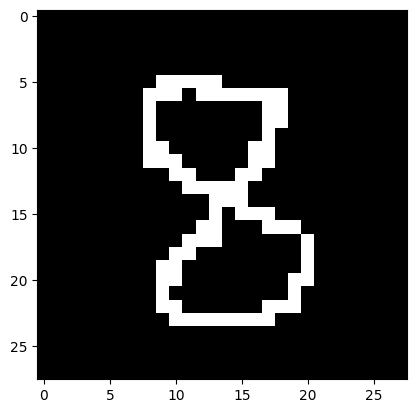

In [19]:
import matplotlib.pyplot as plt
plt.imshow(image[0],cmap='gray')